# **NHPC, GOLD & SILVER ETF Analysis (August 2024 - July 2025)**

In [1]:
!pip install yfinance --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
os.makedirs("images", exist_ok=True)

In [5]:
tickers = ['NHPC.NS', 'GOLDBEES.NS', 'SILVERBEES.NS']
start_date = '2024-08-01'
end_date = '2025-07-31'

In [6]:
df = yf.download(tickers, start=start_date, end=end_date)['Close']
df.dropna(inplace=True)

C:\Users\SHREYA PAI\AppData\Local\Temp\ipykernel_17560\105401105.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


In [7]:
returns = df.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()

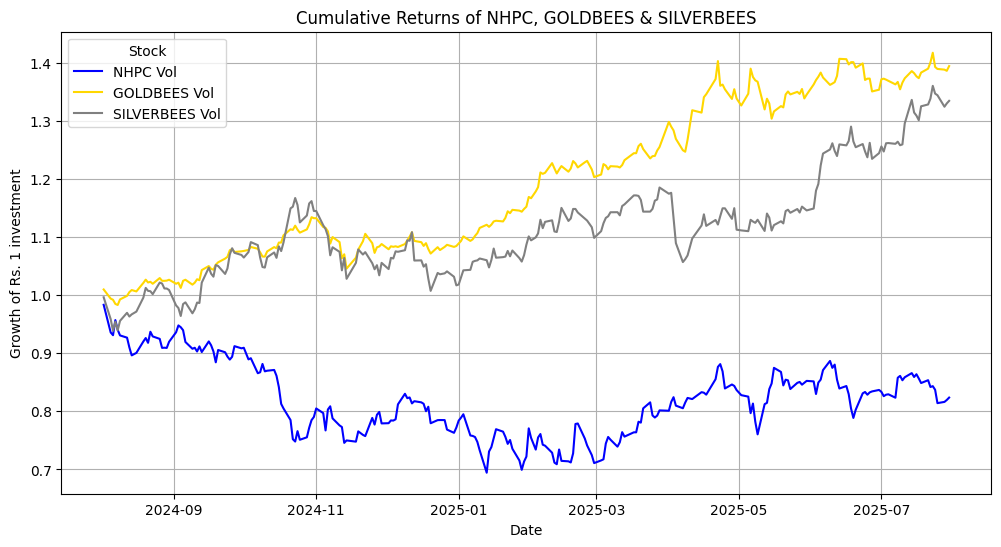

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cumulative_returns['NHPC.NS'], label='NHPC Vol', color='blue')
plt.plot(cumulative_returns['GOLDBEES.NS'], label='GOLDBEES Vol', color='gold')
plt.plot(cumulative_returns['SILVERBEES.NS'], label='SILVERBEES Vol', color='gray')
plt.title('Cumulative Returns of NHPC, GOLDBEES & SILVERBEES')
plt.xlabel('Date')
plt.ylabel('Growth of Rs. 1 investment')
plt.grid(True)
plt.legend(title='Stock')
plt.show()
fig.savefig("images/cumulative_returns.png", dpi=300, bbox_inches='tight')
plt.close()

## **1. Cumulative Returns**

- NHPC showed higher fluctuations compared to Gold & Silver
- Gold & Silver ETFs acted as **defensive assets**, delivering steadier growth
- An equal weighted portfolio of NHPC + Gold + Silver would have reduced risk compared to NHPC alone

In [9]:
sma_20 = df.rolling(window=20).mean()
ema_20 = df.ewm(span=20, adjust=False).mean()

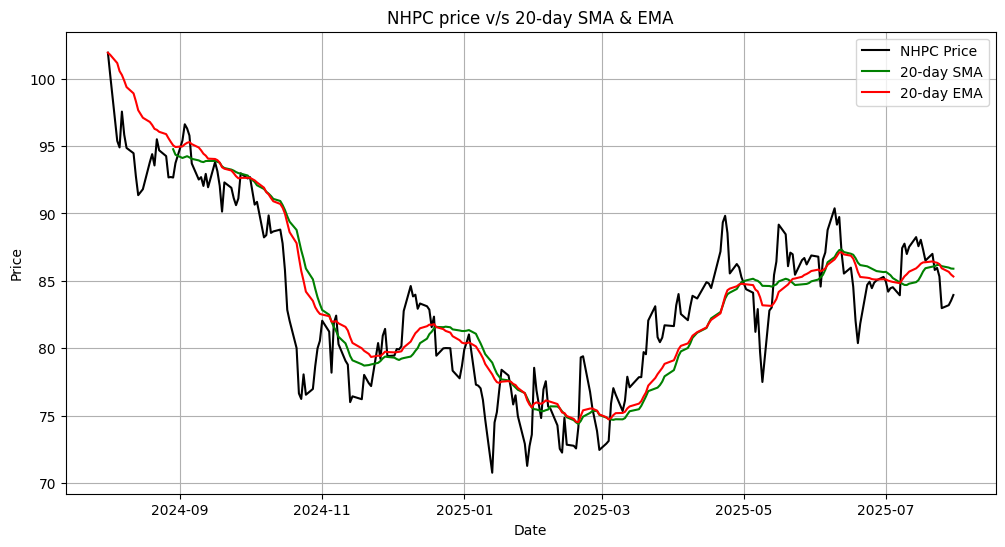

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df['NHPC.NS'], label='NHPC Price', color='black')
plt.plot(sma_20['NHPC.NS'], label='20-day SMA', color='green')
plt.plot(ema_20['NHPC.NS'], label='20-day EMA', color='red')
plt.title('NHPC price v/s 20-day SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()
fig.savefig("images/NHPC.png", dpi=300, bbox_inches='tight')
plt.close()

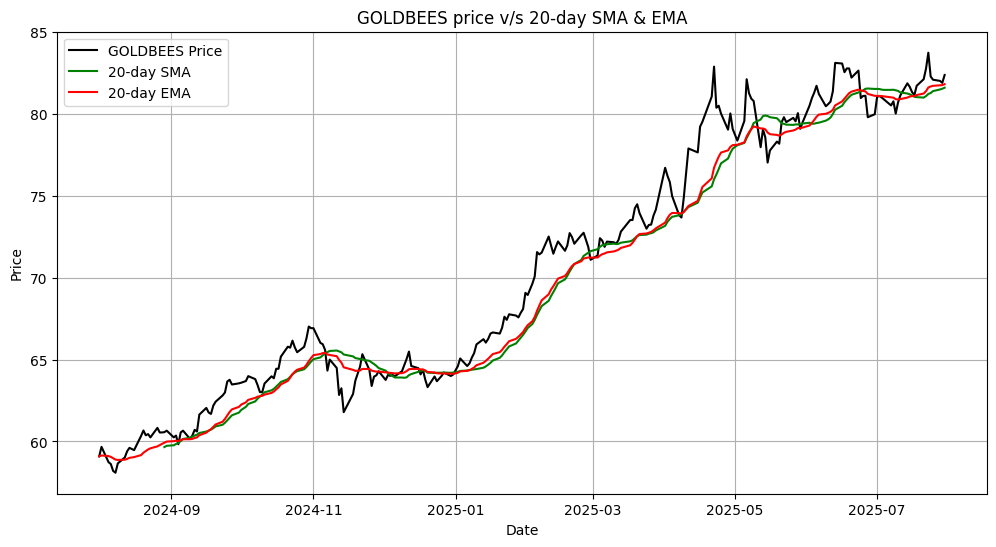

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df['GOLDBEES.NS'], label='GOLDBEES Price', color='black')
plt.plot(sma_20['GOLDBEES.NS'], label='20-day SMA', color='green')
plt.plot(ema_20['GOLDBEES.NS'], label='20-day EMA', color='red')
plt.title('GOLDBEES price v/s 20-day SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()           
fig.savefig("images/GOLDBEES.png", dpi=300, bbox_inches='tight')
plt.close()

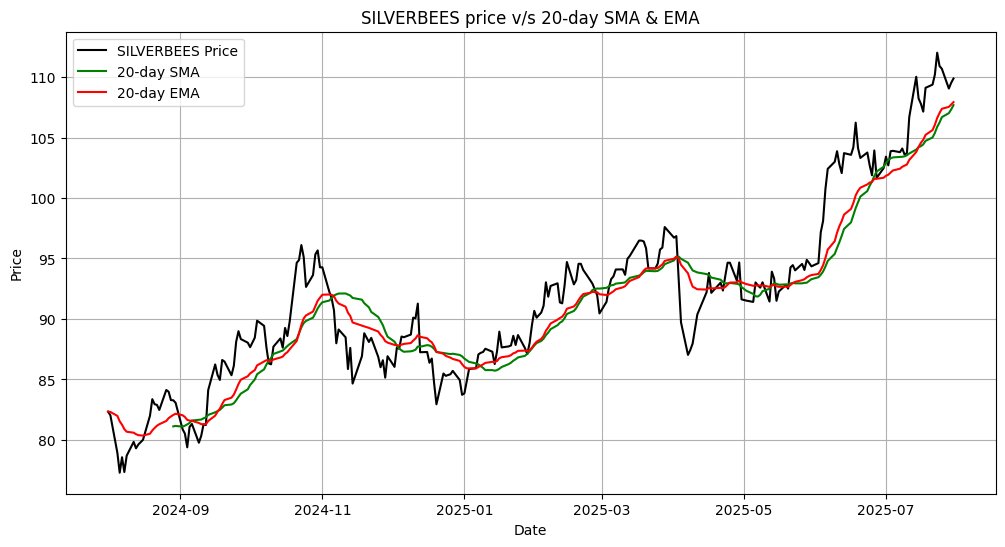

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df['SILVERBEES.NS'], label='SILVERBEES Price', color='black')
plt.plot(sma_20['SILVERBEES.NS'], label='20-day SMA', color='green')
plt.plot(ema_20['SILVERBEES.NS'], label='20-day EMA', color='red')
plt.title('SILVERBEES price v/s 20-day SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()           
fig.savefig("images/SILVERBEES.png", dpi=300, bbox_inches='tight')
plt.close()

## **2. SMA & EMA Trend Analysis**

- Price crossing above EMA-20 often signalled a short-term **bullish** momentum
- NHPC trends were shraper, while Gold/Silver showed smoother mean-reversion tendencies

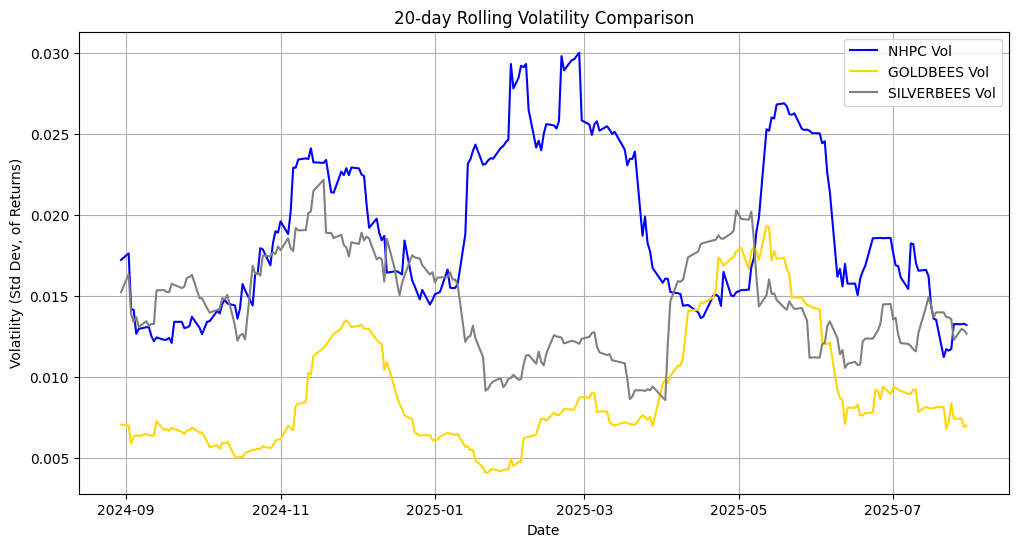

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [22]:
rolling_volatility = returns.rolling(window = 20).std()

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(rolling_volatility['NHPC.NS'], label='NHPC Vol', color='blue')
plt.plot(rolling_volatility['GOLDBEES.NS'], label='GOLDBEES Vol', color='gold')
plt.plot(rolling_volatility['SILVERBEES.NS'], label='SILVERBEES Vol', color='gray')
plt.title('20-day Rolling Volatility Comparison')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev, of Returns)')
plt.grid()
plt.legend()
plt.show()           
fig.savefig("images/rolling_volatility.png", dpi=300, bbox_inches='tight')
plt.close

## **3. Rolling Volatility (20-day)**

- NHPC displayed higher short-term volatility spikes
- Gold had lower volatility most of the time
- Silver volatility was erratic, reflecting commodity price swings


Correlation Matrix:
 Ticker         GOLDBEES.NS   NHPC.NS  SILVERBEES.NS
Ticker                                             
GOLDBEES.NS       1.000000 -0.050319       0.616919
NHPC.NS          -0.050319  1.000000       0.040927
SILVERBEES.NS     0.616919  0.040927       1.000000




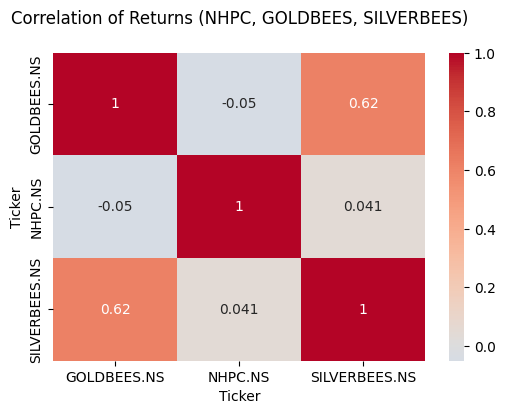

In [25]:
corr_matrix = returns.corr()

print("\nCorrelation Matrix:\n", corr_matrix)
print("\n")

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Returns (NHPC, GOLDBEES, SILVERBEES)\n')
plt.show()
fig.savefig("images/correlation.png", dpi=300, bbox_inches='tight')
plt.close()

## **4. Correlation Matrix**

- Gold and Silver were strongly correlated
- NHPC's correlation with Gold/Silver was close to zero or slightly negative, indicating diversification benefit

In [15]:
rolling_corr_nhpc_gold = returns['NHPC.NS'].rolling(60).corr(returns['GOLDBEES.NS'])
rolling_corr_nhpc_silver = returns['NHPC.NS'].rolling(60).corr(returns['SILVERBEES.NS'])

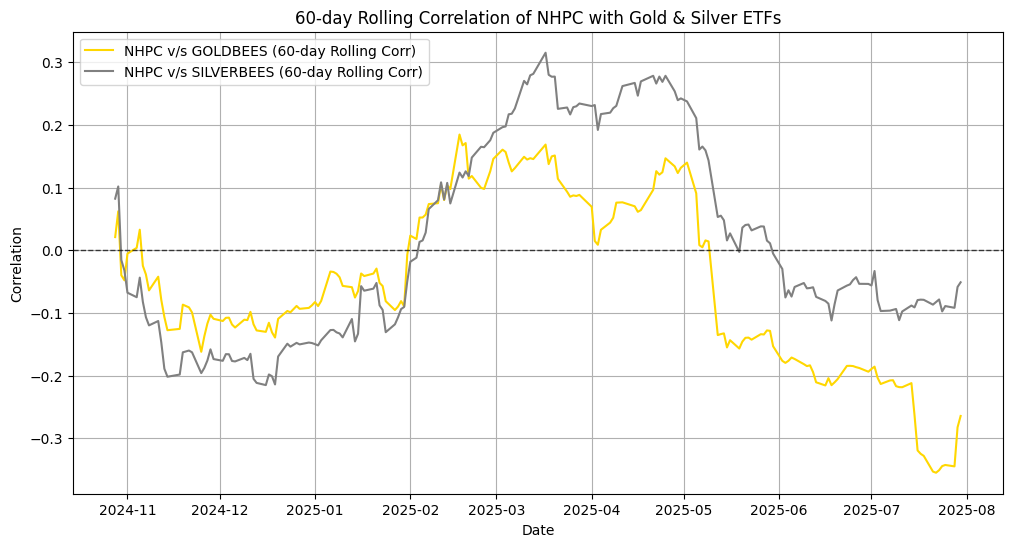

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(rolling_corr_nhpc_gold, label = 'NHPC v/s GOLDBEES (60-day Rolling Corr)', color = 'gold')
plt.plot(rolling_corr_nhpc_silver, label = 'NHPC v/s SILVERBEES (60-day Rolling Corr)', color = 'gray')
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 1, alpha = 0.7)
plt.title('60-day Rolling Correlation of NHPC with Gold & Silver ETFs')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid()
plt.show()
fig.savefig("images/rolling_correlation.png", dpi=300, bbox_inches='tight')
plt.close()

## **5. 60-day Rolling Correlation**

- Correlation values hover around zero or slightly negative, confirming that NHPC (equity) behaves differently from Gold/Silver (commodities)
- During equity drawdowns, correlation sometimes turns negative, showing hedging benefits of Gold/Silver
- Silver correlation is usually more volatile than Gold's, meaning it does not always move consistently with NHPC

## **Observations:**

- NHPC alone is riskier, but offers growth potential
- Gold reduces downside risk during volatile periods
- Silver adds diversification, but with higher fluctuations
- A blended portfolio of NHPC + Gold + Silver balances risk and return

## **Conclusion:**

### **1. Return Trends:**

- Cumulative returns show **NHPC** had equity-driven growth, while **Gold and Silver ETFs** provided relative stable long-term performance
- Gold outperformed Silver over the period, acting as a more consistent wealth-preservation asset

### **2. SMA v/s EMA Comparison:**

- **SMA (20-day)** provided smoother trend signals, while **EMA (20-day)** was more sensitive to price changes
- EMA may be more useful for **short-term trading signals**, while SMA reflects broader trends

### **3. Volatility Analysis:**

- NHPC exhibited **higher short-term volatility**, compared to Gold and Silver ETFs
- Gold remained the **least volatile asset**, reinforcing its reputation as a safe-haven investment
  
### **4. Correlation Analysis:**

- Static correlation between NHPC and Gold/Silver was **low to mildly negative**, supporting diversification benefits
- Rolling correlation (60-day) showed **time-varying relationships**; correlations dipped negative during market stress, highlighting Gold/Silver's role as a **hedge** against equity risk

## **Key Insights**

- A portfolio combining **NHPC (equity)** with **Gold/Silver ETF (commodities)** improved diversification
- **Gold**, in particular, reduces portfolio volatility due to its consistent negative/low correlation with NHPC
- This analysis demonstartes the importance of **multi-asset allocation** for ris-adjusted returns